In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
def get_data():
    # Load data from BigQuery
    # Run pip install pandas-gbq if not installed
    
    sql = """
    SELECT 
      id, 
      title, 
      contents,
      date,
      EXTRACT(MONTH FROM date) date_month,
      EXTRACT(YEAR FROM date) date_year,
      ARRAY_TO_STRING(topics,",") topics,
      ARRAY_TO_STRING(components,",") components
    FROM 
      `jbencina-144002.doj.press_releases`
    """
    
    return pd.read_gbq(sql, dialect='standard')

df = get_data()
df.head()

,id,title,contents,date,date_month,date_year,topics,components
0,None,Massachusetts Man Sentenced to Over Seven Year...,U.S. Attorney Thomas E. Delahanty II of the Di...,2015-07-14 04:00:00,7,2015,,USAO - Maine
1,None,Man Charged for His Role in Creating the Krono...,"Gregory J. Haanstad, United States Attorney fo...",2017-08-03 04:00:00,8,2017,,USAO - Nevada
2,None,Five Individuals Charged in Nationwide Identit...,Conspirators Obtain Identity Information of 12...,2015-05-13 04:00:00,5,2015,,USAO - Oregon
3,None,Federal Operation Convicts Nine Montanans of M...,U.S. Attorney Michael W. Cotter for the Distri...,2015-06-17 04:00:00,6,2015,,USAO - Montana
4,None,"Montana Drug Operation Convicts 20 Defendants,...",The U.S. Attorney’s Office announces today the...,2015-06-18 04:00:00,6,2015,,USAO - Montana


## Counts over time

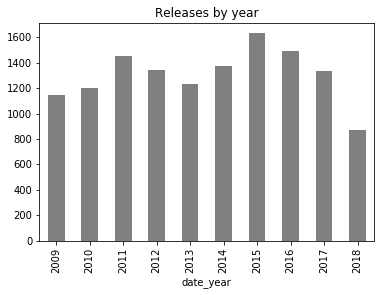

In [38]:
def show_monthly_counts(data):
    data.groupby('date_year').title.count().plot(kind='bar', color='gray', title='Releases by year')
show_monthly_counts(df)

## Show topics over time
Topics more sparse before 2011

In [90]:
def topics_over_time(data):
    df = data[(data.topics.str.len()>0) & (data.date_year >= 2011)]\
        .set_index('date_year')\
        .topics.str.split(',')\
        .apply(pd.Series)\
        .stack()\
        .reset_index(level=1, drop=True)\
        .groupby('date_year')\
        .apply(lambda x: x.value_counts().nlargest(3))
    
    return df

topics_over_time(df)

date_year                     
2011       Hate Crimes             41
           Consumer Protection     31
           StopFraud               25
2012       StopFraud               71
           Consumer Protection     49
           Hate Crimes             35
2013       Consumer Protection     50
           StopFraud               26
           Hate Crimes             26
2014       Consumer Protection     48
           Hate Crimes             29
           Antitrust               18
2015       Tax                    187
           Health Care Fraud      111
           National Security       99
2016       Tax                    300
           Civil Rights           229
           Antitrust              105
2017       Tax                    258
           Civil Rights           112
           Antitrust               80
2018       Tax                    117
           Health Care Fraud       58
           Counterterrorism        40
dtype: int64

## Show components over time

In [91]:
def components_over_time(data):
    df = data[(data.components.str.len()>0) & (data.date_year >= 2011)]\
        .set_index('date_year')\
        .components.str.split(',')\
        .apply(pd.Series)\
        .stack()\
        .reset_index(level=1, drop=True)\
        .groupby('date_year')\
        .apply(lambda x: x.value_counts().nlargest(3))
    
    return df

components_over_time(df)

date_year                       
2011       Criminal Division        479
           Civil Rights Division    285
           Tax Division             220
2012       Criminal Division        432
           Civil Rights Division    298
           Tax Division             196
2013       Criminal Division        373
           Civil Rights Division    270
           Tax Division             227
2014       Criminal Division        412
           Civil Rights Division    235
           Tax Division             230
2015       Criminal Division        348
           Tax Division             276
           Civil Rights Division    261
2016       Criminal Division        313
           Tax Division             292
           Civil Rights Division    240
2017       Criminal Division        352
           Tax Division             258
            Eastern                 177
2018       Criminal Division        268
           Civil Rights Division    126
           Tax Division             125
dtype: 